# Extended Data Figure 7

## Extended Data Figure 7d

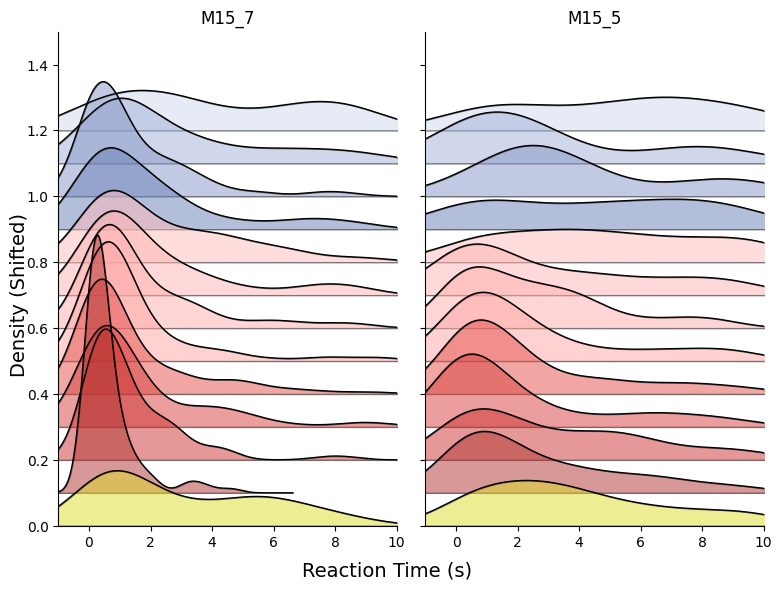

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
import os

# Set npz file path
figure_data_folder = "../Source data/Extended Data Figure 7"
npz_file_path = os.path.join(figure_data_folder, "reaction_times_data.npz")

# Ensure the file exists
if not os.path.exists(npz_file_path):
    raise FileNotFoundError(f"File {npz_file_path} not found. Please check the file path.")

# Load npz file
data = np.load(npz_file_path, allow_pickle=True)

# Convert to dictionary
reaction_time_data = {key: data[key].tolist() for key in data.files}

shift_factor = 0.1  # Vertical offset

# Define session_palette
session_palette = {
    session_index + 1: color for session_index, color in enumerate([
        '#D1D9EC', '#a2b1d8', '#8597c6', '#697fb7', 
        '#ffbcbb', '#ffb5b4', '#ffaeac', '#ffa6a5', 
        '#e44e4b', '#d93f3c', '#cc3330', '#b03533', '#ddde29', '#bcbd21'
    ])
}

# Select subjects of interest
selected_subjects = ["M15_7", "M15_5"]

# Create 2 subplots
fig, axes = plt.subplots(1, 2, figsize=(8, 6), sharex=True, sharey=True)

for subject, ax in zip(selected_subjects, axes):
    subject_data = reaction_time_data[subject]
    sessions = sorted(subject_data.keys(), key=lambda x: int(x.split("_")[-1]))

    for i, session_key in enumerate(sessions[:13]):  # Only plot the first 13 days
        session_data = subject_data[session_key]
        x_values = session_data["x_values"]
        y_values = session_data["y_values"]

        y_values_shifted = y_values + shift_factor * (len(sessions[:13]) - 1 - i)

        ax.fill_between(
            x_values,
            shift_factor * (len(sessions[:13]) - 1 - i),
            y_values_shifted,
            alpha=0.5,
            color=session_palette[int(session_key.split("_")[-1])],
            edgecolor="black"
        )
        ax.plot(x_values, y_values_shifted, color='black', linewidth=1)

    ax.set_title(f"{subject}", fontsize=12)
    ax.set_xlim(-1, 10)
    ax.set_ylim(0, shift_factor * 13 + 0.2)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

# Set global axis labels
fig.text(0.5, 0.04, "Reaction Time (s)", ha='center', va='center', fontsize=14)
fig.text(0.04, 0.5, "Density (Shifted)", ha='center', va='center', rotation='vertical', fontsize=14)

# Adjust layout
plt.tight_layout(rect=[0.03, 0.05, 1, 1])

# Save figure
# output_pdf = os.path.join(figure_data_folder, "reaction_time_selected_subjects.pdf")
# plt.savefig(output_pdf)
plt.show()

# print(f"✅ Figure saved as {output_pdf}")

In [2]:
import numpy as np
import pandas as pd
from scipy.stats import ttest_ind

# Function to get significance stars
def get_significance_stars(p_value):
    """Return stars based on p-value thresholds."""
    if p_value < 0.001:
        return '***'
    elif p_value < 0.01:
        return '**'
    elif p_value < 0.05:
        return '*'
    else:
        return 'n.s.'

# Load reaction time data from NPZ
npz_file_path = "../Source data/Extended Data Figure 7/reaction_times_data.npz"
data = np.load(npz_file_path, allow_pickle=True)

# Convert the loaded data (dictionary) into a usable structure
reaction_time_data = {key: data[key].tolist() for key in data.files}

# Create a DataFrame for analysis
reaction_times_list = []

for subject, session_dict in reaction_time_data.items():
    for session_key, session_data in session_dict.items():
        session_number = int(session_key.split("_")[-1])  # Extract session number
        x_values = session_data["x_values"]  # Reaction times

        # Add data to the list
        for rt in x_values:
            reaction_times_list.append({"subject": subject, "session": session_number, "reaction_time": rt})

# Convert to DataFrame
reaction_times = pd.DataFrame(reaction_times_list)

# Iterate over each subject and calculate significance
subjects = reaction_times['subject'].unique()

for subject in subjects:
    stats = reaction_times[reaction_times['subject'] == subject]
    sessions = sorted(stats['session'].unique())

    # Group data for the specified session ranges
    session_data_dict = {
        session: stats[stats['session'] == session]['reaction_time'].values 
        for session in sessions if len(stats[stats['session'] == session]) > 0
    }

    # Helper function to combine data from multiple sessions
    def combine_sessions(sessions_to_combine):
        combined_data = []
        for session in sessions_to_combine:
            if session in session_data_dict:
                combined_data.extend(session_data_dict[session])
        return np.array(combined_data)

    # Combine data for the defined session groups
    group_1 = combine_sessions(range(1, 5))  # Sessions 1-4
    group_2 = combine_sessions(range(5, 10))  # Sessions 5-9
    group_3 = combine_sessions(range(10, 14))  # Sessions 10-13

    # Perform t-tests between the groups
    if len(group_1) > 0 and len(group_2) > 0:
        t_stat_1_2, p_val_1_2 = ttest_ind(group_1, group_2, equal_var=False)
        stars_1_2 = get_significance_stars(p_val_1_2)
        print(f"Subject {subject}: Group 1-4 vs Group 5-9: p-value = {p_val_1_2:.5f} ({stars_1_2})")

    if len(group_1) > 0 and len(group_3) > 0:
        t_stat_1_3, p_val_1_3 = ttest_ind(group_1, group_3, equal_var=False)
        stars_1_3 = get_significance_stars(p_val_1_3)
        print(f"Subject {subject}: Group 1-4 vs Group 10-13: p-value = {p_val_1_3:.5f} ({stars_1_3})")

    if len(group_2) > 0 and len(group_3) > 0:
        t_stat_2_3, p_val_2_3 = ttest_ind(group_2, group_3, equal_var=False)
        stars_2_3 = get_significance_stars(p_val_2_3)
        print(f"Subject {subject}: Group 5-9 vs Group 10-13: p-value = {p_val_2_3:.5f} ({stars_2_3})")

Subject M15_2: Group 1-4 vs Group 5-9: p-value = 0.48190 (n.s.)
Subject M15_2: Group 1-4 vs Group 10-13: p-value = 0.92349 (n.s.)
Subject M15_2: Group 5-9 vs Group 10-13: p-value = 0.42251 (n.s.)
Subject M15_3: Group 1-4 vs Group 5-9: p-value = 0.39465 (n.s.)
Subject M15_3: Group 1-4 vs Group 10-13: p-value = 0.95491 (n.s.)
Subject M15_3: Group 5-9 vs Group 10-13: p-value = 0.36642 (n.s.)
Subject M15_5: Group 1-4 vs Group 5-9: p-value = 0.03516 (*)
Subject M15_5: Group 1-4 vs Group 10-13: p-value = 0.34887 (n.s.)
Subject M15_5: Group 5-9 vs Group 10-13: p-value = 0.26674 (n.s.)
Subject M15_7: Group 1-4 vs Group 5-9: p-value = 0.56552 (n.s.)
Subject M15_7: Group 1-4 vs Group 10-13: p-value = 0.00000 (***)
Subject M15_7: Group 5-9 vs Group 10-13: p-value = 0.00000 (***)
Subject M16_1: Group 1-4 vs Group 5-9: p-value = 0.45955 (n.s.)
Subject M16_1: Group 1-4 vs Group 10-13: p-value = 0.14162 (n.s.)
Subject M16_1: Group 5-9 vs Group 10-13: p-value = 0.02240 (*)


## Extended Data Figure 7e-f

Unit used in Extended Data Figure e, from top to bottom

1. ('CA1', 'M16_1', 59)
2. ('CA1', 'M16_1', 36)
3. ('CA1', 'M15_7', 13)
4. ('CA1', 'M16_1', 33)
5. ('CA1', 'M16_1', 8)

Unit used in Extended Data Figure f, from top to bottom

1. ('M1', 'M15_7', 21)
2. ('M1', 'M15_7', 14)
3. ('M1', 'M15_3', 23)
4. ('M1', 'M15_5', 34)
5. ('M1', 'M15_7', 30)

In [10]:
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt

# Data and output directories
source_data_folder = "../Source data/Extended Data Figure 7/Raster"
output_folder = "Extended Data Figure 7e"
os.makedirs(output_folder, exist_ok=True)

# Only these 10 units to plot
selected_units = [
    ('CA1', 'M16_1', 59),
    ('CA1', 'M16_1', 36),
    ('CA1', 'M15_7', 13),
    ('CA1', 'M16_1', 33),
    ('CA1', 'M16_1', 8),
    ('M1', 'M15_7', 21),
    ('M1', 'M15_7', 14),
    ('M1', 'M15_3', 23),
    ('M1', 'M15_5', 34),
    ('M1', 'M15_7', 30),
]

# Use full segment list and default plotting segments for each
default_segments = list(range(14))  # just to ensure coverage
default_psth_segments = [0, 7, 12]  # can be adjusted if needed

# Region colors
region_colors = {
    "CA1": "#29d9eb",  # Blue
    "M1": "#d62727"    # Red
}

# Plotting loop
for region, subject, unit_id in selected_units:
    base_name = f"{subject}-{region}-{unit_id}"

    # File paths
    spike_data_file = os.path.join(source_data_folder, f"{base_name}-spike_data.pkl")
    psth_data_file = os.path.join(source_data_folder, f"{base_name}-PSTH_data.npz")

    # Ensure files exist
    if not os.path.exists(spike_data_file) or not os.path.exists(psth_data_file):
        print(f" Skipping {base_name} (Data not found)")
        continue

    print(f" Processing {base_name}...")

    # Load data
    with open(spike_data_file, "rb") as f:
        raster_data = pickle.load(f)
    psth_data = np.load(psth_data_file)["psth_bins"]

    # Raster plot
    fig, ax = plt.subplots(figsize=(6, 12))
    trial_counter = 0
    for segment_index in default_segments:
        if segment_index not in raster_data:
            continue
        for trial_spike_times in raster_data[segment_index]:
            ax.vlines(trial_spike_times, trial_counter, trial_counter + 1, color=region_colors.get(region, "black"), linewidth=0.5)
            trial_counter += 1
    ax.set_ylabel("Trials")
    ax.set_xlabel("Time from cue onset (s)")
    ax.set_xticks([-1, 0, 1])
    ax.set_title(f"Raster Plot: {base_name}")
    plt.savefig(os.path.join(output_folder, f"{base_name}-raster.png"))
    plt.close()

    # PSTH: Selected segments
    fig, ax = plt.subplots(figsize=(6, 4))
    time_bins = np.linspace(-1, 1, psth_data.shape[1])
    colors = plt.cm.viridis(np.linspace(0, 1, len(default_psth_segments)))
    for idx, segment_index in enumerate(default_psth_segments):
        if segment_index < len(psth_data):
            ax.plot(time_bins, psth_data[segment_index], color=colors[idx], label=f"Segment {segment_index}")
    ax.set_xlabel("Time from cue onset (s)")
    ax.set_ylabel("Normalized Firing Rate")
    ax.set_ylim(0, 1)
    ax.set_title(f"PSTH (Selected): {base_name}")
    ax.legend(title="Segments", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.savefig(os.path.join(output_folder, f"{base_name}-PSTH-selected.pdf"), bbox_inches="tight")
    plt.close()

    # PSTH: All segments
    fig, ax = plt.subplots(figsize=(6, 4))
    all_colors = plt.cm.viridis(np.linspace(0, 1, len(psth_data)))
    for segment_idx in range(len(psth_data)):
        ax.plot(time_bins, psth_data[segment_idx], color=all_colors[segment_idx], label=f"Segment {segment_idx}")
    ax.set_xlabel("Time from cue onset (s)")
    ax.set_ylabel("Normalized Firing Rate")
    ax.set_ylim(0, 1)
    ax.set_title(f"PSTH (All): {base_name}")
    ax.legend(title="Segments", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.savefig(os.path.join(output_folder, f"{base_name}-PSTH-all.png"), bbox_inches="tight")
    plt.close()

    print(f"✅ Saved all plots for {base_name}")


 Processing M16_1-CA1-59...
✅ Saved all plots for M16_1-CA1-59
 Processing M16_1-CA1-36...
✅ Saved all plots for M16_1-CA1-36
 Processing M15_7-CA1-13...
✅ Saved all plots for M15_7-CA1-13
 Processing M16_1-CA1-33...
✅ Saved all plots for M16_1-CA1-33
 Processing M16_1-CA1-8...
✅ Saved all plots for M16_1-CA1-8
 Processing M15_7-M1-21...
✅ Saved all plots for M15_7-M1-21
 Processing M15_7-M1-14...
✅ Saved all plots for M15_7-M1-14
 Processing M15_3-M1-23...
✅ Saved all plots for M15_3-M1-23
 Processing M15_5-M1-34...
✅ Saved all plots for M15_5-M1-34
 Processing M15_7-M1-30...
✅ Saved all plots for M15_7-M1-30
